In [29]:
!pip install pillow

In [30]:
!pip install requests

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

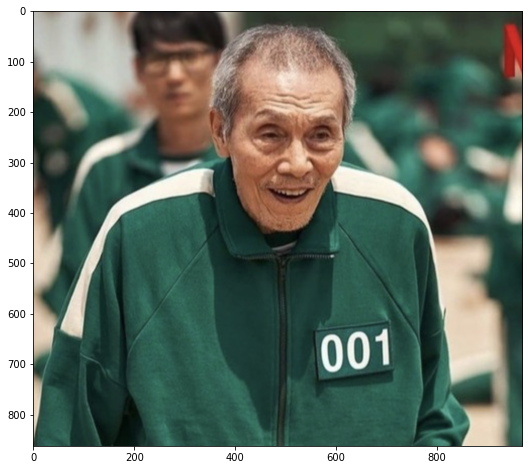

In [32]:
img = mpimg.imread('grandpa.png')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [33]:
import requests

In [34]:
client_id = "YPUlVslHJcbE62y7YsBt"
client_secret = "sbdytXQxqj"
#client_id = "guNXoD62a25MMK2_7cT1"
#client_secret = "MYWC9jnZJ3"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('grandpa.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [35]:
import json

In [36]:
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 970,
            "height": 862
        },
        "faceCount": 2
    },
    "faces": [
        {
            "celebrity": {
                "value": "임권택",
                "confidence": 0.16259
            }
        },
        {
            "celebrity": {
                "value": "강민",
                "confidence": 0.01
            }
        }
    ]
}


In [37]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('grandpa.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 970,
            "height": 862
        },
        "faceCount": 2
    },
    "faces": [
        {
            "roi": {
                "x": 395,
                "y": 189,
                "width": 230,
                "height": 230
            },
            "landmark": {
                "leftEye": {
                    "x": 468,
                    "y": 241
                },
                "rightEye": {
                    "x": 569,
                    "y": 245
                },
                "nose": {
                    "x": 529,
                    "y": 312
                },
                "leftMouth": {
                    "x": 458,
                    "y": 350
                },
                "rightMouth": {
                    "x": 546,
                    "y": 354
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999534
            },
           

In [38]:
detect_result = parsed

In [39]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [40]:
detect_result['faces']

[{'roi': {'x': 395, 'y': 189, 'width': 230, 'height': 230},
  'landmark': {'leftEye': {'x': 468, 'y': 241},
   'rightEye': {'x': 569, 'y': 245},
   'nose': {'x': 529, 'y': 312},
   'leftMouth': {'x': 458, 'y': 350},
   'rightMouth': {'x': 546, 'y': 354}},
  'gender': {'value': 'male', 'confidence': 0.999534},
  'age': {'value': '93~97', 'confidence': 0.480302},
  'emotion': {'value': 'smile', 'confidence': 0.809058},
  'pose': {'value': 'frontal_face', 'confidence': 0.977461}},
 {'roi': {'x': 218, 'y': 52, 'width': 144, 'height': 144},
  'landmark': {'leftEye': {'x': 254, 'y': 86},
   'rightEye': {'x': 304, 'y': 85},
   'nose': {'x': 278, 'y': 133},
   'leftMouth': {'x': 259, 'y': 167},
   'rightMouth': {'x': 308, 'y': 163}},
  'gender': {'value': 'male', 'confidence': 0.98997},
  'age': {'value': '30~34', 'confidence': 0.601198},
  'emotion': {'value': 'neutral', 'confidence': 0.999162},
  'pose': {'value': 'frontal_face', 'confidence': 0.991218}}]

In [41]:
detect_result['faces'][0]

{'roi': {'x': 395, 'y': 189, 'width': 230, 'height': 230},
 'landmark': {'leftEye': {'x': 468, 'y': 241},
  'rightEye': {'x': 569, 'y': 245},
  'nose': {'x': 529, 'y': 312},
  'leftMouth': {'x': 458, 'y': 350},
  'rightMouth': {'x': 546, 'y': 354}},
 'gender': {'value': 'male', 'confidence': 0.999534},
 'age': {'value': '93~97', 'confidence': 0.480302},
 'emotion': {'value': 'smile', 'confidence': 0.809058},
 'pose': {'value': 'frontal_face', 'confidence': 0.977461}}

In [42]:
detect_result['faces'][0]['roi']

{'x': 395, 'y': 189, 'width': 230, 'height': 230}

In [43]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999534}

In [44]:
detect_result['faces'][0]['age']

{'value': '93~97', 'confidence': 0.480302}

In [45]:
detect_result['faces'][0]['emotion']

{'value': 'smile', 'confidence': 0.809058}

In [46]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [47]:
annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [48]:
import matplotlib.patches as patches

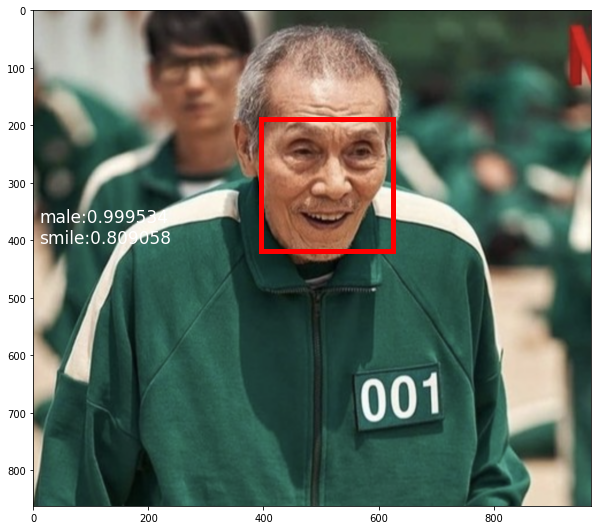

In [49]:
img = mpimg.imread('grandpa.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

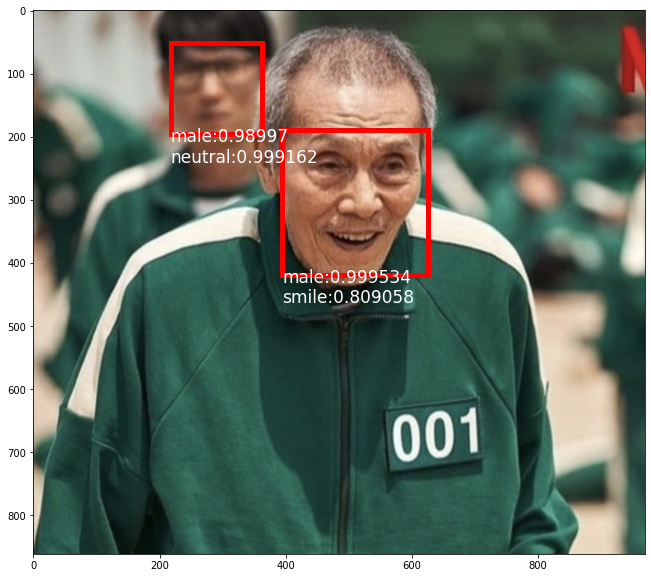

In [50]:
img = mpimg.imread('grandpa.png')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='white')
    ax.add_patch(rect_face)

    
plt.show()